In [ ]:
#出来ている

In [1]:
include("src/Sim.jl")

Main.Sim

In [2]:
using DifferentialEquations
using Plots
using .Sim

In [ ]:
using Pkg
Pkg.add(url="https://github.com/JuliaMBD/JuliaMBDv1.git")

In [ ]:
import Pkg
Pkg.add("Plots")
Pkg.add("DifferentialEquations")

In [ ]:
using JuliaMBDv1
using DifferentialEquations
using Plots

In [3]:
#M_Fr_wheelは初期値が指定されていなかったので自分で勝手に定めた
#initialcondition = 6と勝手に指定,掛け算割り算は直接演算
@model mus_r_pnt begin
    @parameter g M_Rr_wheel
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Constant1 = ConstantBlock(g)
    @blk Constant = ConstantBlock(M_Rr_wheel)
    @blk Add2 = AddBlock([:+, :+, :-]) inport[1]:in1 inport[2]:in2 inport[3]:pro
    @blk Integrator = IntegratorBlock(initialcondition = 6)
    
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    @connect In1 => in1
    @connect In2 => in2
    @connect Constant1 * Constant => pro
    @connect Add2 / Constant => Integrator
    @connect Integrator => Out1
    @connect Integrator => Out2
end

mus_r_pnt (generic function with 1 method)

In [4]:
@model TestMus_r_pnt begin
    
    @parameter g M_Rr_wheel
    
    @blk Ramp1 = RampBlock(starttime = 10, slope = 5) outport:inin1
    @blk Ramp2 = RampBlock(starttime = 10, slope = 15) outport:inin2
    @blk pitch = mus_r_pnt(g=g, M_Rr_wheel=M_Rr_wheel) inport[1]:r inport[2]:y outport[1]:omega outport[2]:beta
    @connect inin1 => r
    @connect inin2 => y

end

TestMus_r_pnt (generic function with 1 method)

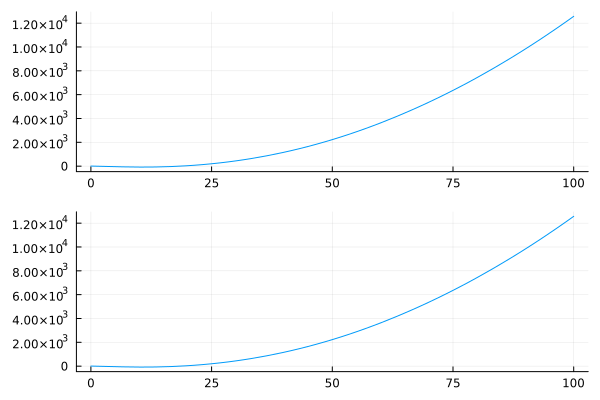

In [5]:
m = TestMus_r_pnt(g=9.8, M_Rr_wheel = 6);
sol = @simulate(m, tspan=(0.0, 100.0), scope=(omega, beta));
sol.graph